In [2]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}


Toggle code

ImportError: Traceback (most recent call last):
  File "E:\Users\Gamer\anaconda3\envs\test_tensorflow_install\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [6]:
global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pd.read_pickle( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pd.read_pickle( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pd.read_pickle( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pd.read_pickle( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



In [8]:
# BES_df_list

In [12]:
f2f_harmonised[f2f_harmonised["dataset"]=="1997"][["vote","age"]]["vote"].value_counts()

vote
LAB    1367
DNV     766
CON     735
LD      459
SNP     132
DK       65
REF      54
OTH      19
PC       11
GP        7
Name: count, dtype: int64

In [38]:
f2f_harmonised[f2f_harmonised["dataset"]=="2010"][["vote","age"]]["vote"].value_counts()

vote
CON     815
LAB     731
DNV     678
LD      500
DK      117
SNP     105
UKIP     46
BNP      32
GP       24
PC       16
OTH      11
Name: count, dtype: int64

In [32]:
f2f_harmonised["ageGroup"]

index
0       26-35
1       36-45
2       26-35
3       18-25
4       26-35
        ...  
2917    18-25
2918    18-25
2919    18-25
2920    26-35
2921    18-25
Name: ageGroup, Length: 52731, dtype: category
Categories (6, object): ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

In [20]:
def age_group(x):
    if x<=25:
        return "18-25"
    if x<=35:
        return "26-35"
    if x<=45:
        return "36-45"
    if x<=55:
        return "46-55"
    if x<=65:
        return "56-65"
    else:
        return "66+"
    

f2f_1997["ageGroup"] = f2f_1997["age"].apply(age_group).astype('category')

In [31]:
f2f_harmonised["ageGroup"] = f2f_harmonised["age"].apply(age_group).astype('category')

In [35]:
f2f_1997 = f2f_harmonised[f2f_harmonised["dataset"]=="1997"].copy()
f2f_2005 = f2f_harmonised[f2f_harmonised["dataset"]=="2005"].copy()
f2f_2010 = f2f_harmonised[f2f_harmonised["dataset"]=="2010"].copy()
f2f_2015 = f2f_harmonised[f2f_harmonised["dataset"]=="2015"].copy()

<Axes: xlabel='age', ylabel='vote'>

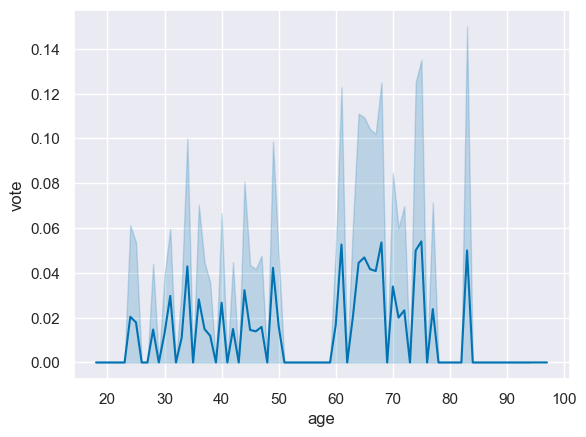

In [14]:
sns.lineplot(x=f2f_1997["age"], y=f2f_1997["vote"]=="REF")

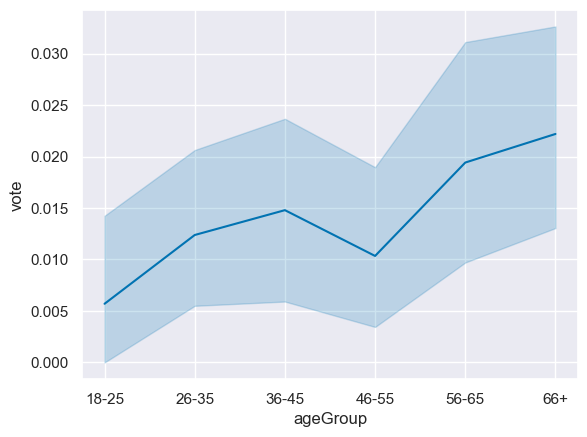

In [22]:
sns.lineplot(x=f2f_1997["ageGroup"], y=f2f_1997["vote"]=="REF");

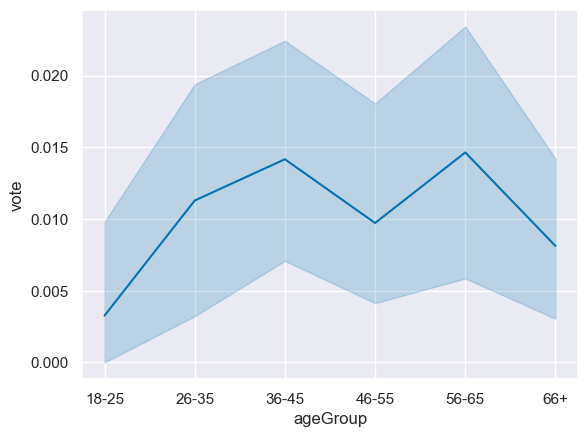

In [34]:
sns.lineplot(x=f2f_2005["ageGroup"], y=f2f_2005["vote"]=="UKIP");

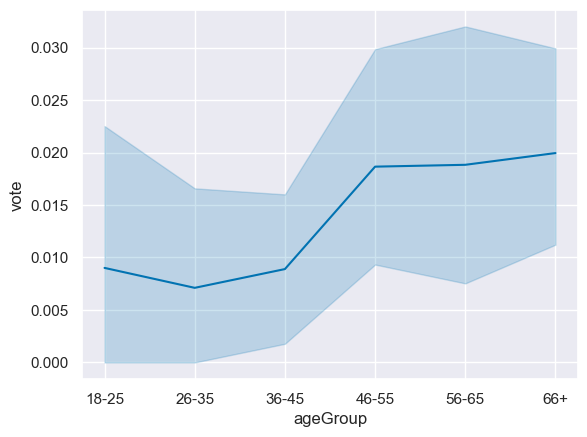

In [36]:
sns.lineplot(x=f2f_2010["ageGroup"], y=f2f_2010["vote"]=="UKIP");

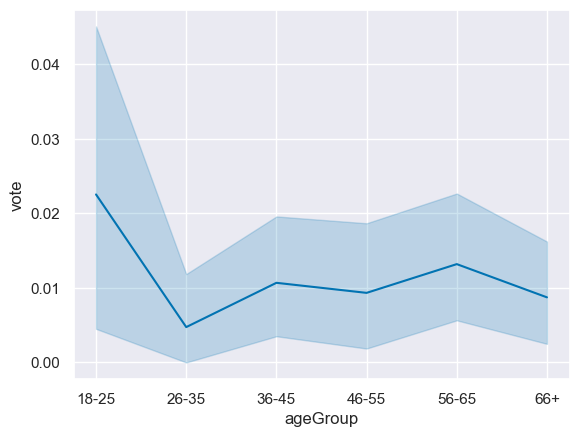

In [39]:
sns.lineplot(x=f2f_2010["ageGroup"], y=f2f_2010["vote"]=="BNP");

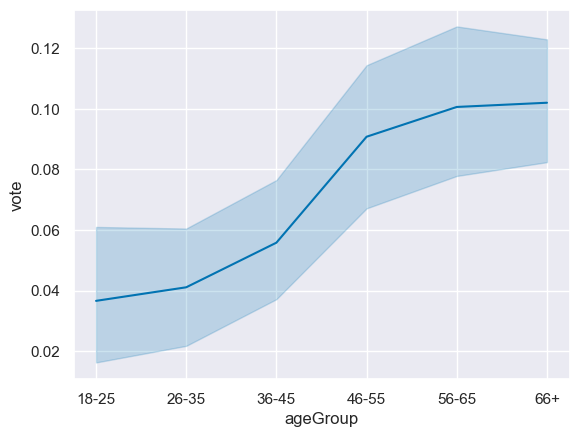

In [37]:
sns.lineplot(x=f2f_2015["ageGroup"], y=f2f_2015["vote"]=="UKIP");

In [42]:
var_type_dict_nonans["2010"]

{'cserial': 'unknown',
 'agor': 'unknown',
 'aq1': 'unknown',
 'aq2': 'unknown',
 'aq3': 'unknown',
 'aq4a': 'unknown',
 'aq4b': 'unknown',
 'aq4c': 'unknown',
 'aq4d': 'unknown',
 'aq4e': 'unknown',
 'aq4f': 'unknown',
 'aq4g': 'unknown',
 'aq4h': 'unknown',
 'aq4i': 'unknown',
 'aq5a': 'unknown',
 'aq5b': 'unknown',
 'aq5c': 'unknown',
 'aq5d': 'unknown',
 'aq5e': 'unknown',
 'aq5f': 'unknown',
 'aq5g': 'unknown',
 'aq5h': 'unknown',
 'aq5i': 'unknown',
 'aq6a': 'unknown',
 'aq6b': 'unknown',
 'aq6c': 'unknown',
 'aq6d': 'unknown',
 'aq6e': 'unknown',
 'aq6f': 'unknown',
 'aq6g': 'unknown',
 'aq6h': 'unknown',
 'aq6i': 'unknown',
 'aq6j': 'unknown',
 'aq6k': 'unknown',
 'aq7a': 'unknown',
 'aq7b': 'unknown',
 'aq7c': 'unknown',
 'aq7d': 'unknown',
 'aq7e': 'unknown',
 'aq7f': 'unknown',
 'aq7g': 'unknown',
 'aq7h': 'unknown',
 'aq7i': 'unknown',
 'aq7j': 'unknown',
 'aq7k': 'unknown',
 'aq8a': 'unknown',
 'aq8b': 'unknown',
 'aq8c': 'unknown',
 'aq8d': 'unknown',
 'aq8e': 'unknown',


In [47]:
search(BES_df_list["2015"],"s01")
# s01_4 = UKIP

s01_1    2987
s01_2    2987
s01_3    2987
s01_4    2987
s01_5    2987
s01_6     266
s01_7     161
dtype: int64

<Axes: xlabel='s01_4', ylabel='Count'>

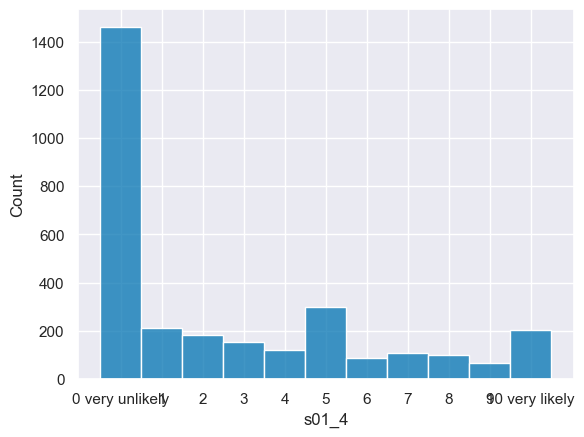

In [53]:
sns.histplot(BES_df_list["2015"]["s01_4"].astype('category'))

<Axes: xlabel='Age'>

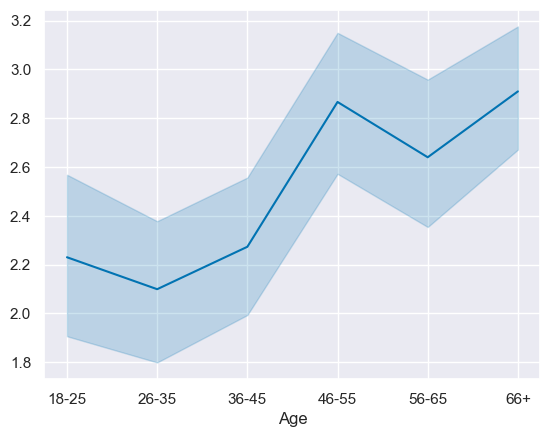

In [58]:
sns.lineplot(x=BES_df_list["2015"]["Age"].apply(age_group).astype('category'),
             y=BES_df_list["2015"]["s01_4"].astype('category').cat.codes.replace(-1,np.nan))

In [55]:
search(BES_df_list["2015"],"age")

Age    2987
dtype: int64